In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score

### 导入数据

In [2]:
breast_cancer=load_breast_cancer()

### 查看数据

In [3]:
breast_cancer.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [4]:
breast_cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [5]:
breast_cancer.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [6]:
breast_cancer.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [7]:
breast_cancer.data.shape

(569, 30)

### 拆分训练与测试数据

In [8]:
xtrain,xtest,ytrain,ytest=train_test_split(breast_cancer.data,breast_cancer.target,test_size=0.3,random_state=30)

### 用cross valid简单看下效果

In [9]:
rfc=RandomForestClassifier(n_estimators=30,random_state=30)
score=cross_val_score(rfc,xtrain,ytrain,cv=10).mean()
print("score:{:0.6f}".format(score))

score:0.959808


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import plot
%matplotlib inline

## 导入xgboost模型
### sklearn方法

- xgboost.train 是用于通过梯度提升方法训练模型的低级 API。
- xgboost.XGBRegressor 和 xgboost.XGBClassifier 是准备 DMatrix 并传递相应的目标函数和参数的包装器 (如他们称为 Scikit-Learn 的包装器)。

In [11]:
from xgboost import XGBClassifier

In [12]:
# build a very simple model
model = XGBClassifier()
model.fit(xtrain, ytrain);

[14:09:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [13]:
# dump it to a text file
model.get_booster().dump_model('xgb_model.txt', with_stats=True)

In [14]:
# read the contents of the file
with open('xgb_model.txt', 'r') as f:
    txt_model = f.read()

In [15]:
print(txt_model)

booster[0]:
0:[f27<0.14199999] yes=1,no=2,missing=1,gain=257.533051,cover=99.5
	1:[f23<957.450012] yes=3,no=4,missing=3,gain=40.4913025,cover=65
		3:[f13<35.4350014] yes=7,no=8,missing=7,gain=3.49476624,cover=61
			7:[f27<0.136799991] yes=15,no=16,missing=15,gain=0.380523682,cover=56.25
				15:leaf=0.584000051,cover=55.25
				16:leaf=0.150000006,cover=1
			8:[f21<28.1300011] yes=17,no=18,missing=17,gain=3.34668183,cover=4.75
				17:[f18<0.021639999] yes=19,no=20,missing=19,gain=1.69824553,cover=3.75
					19:leaf=-0,cover=1
					20:leaf=0.440000027,cover=2.75
				18:leaf=-0.150000006,cover=1
		4:[f1<18.4950008] yes=9,no=10,missing=9,gain=1.80000019,cover=4
			9:leaf=-0,cover=1
			10:leaf=-0.450000018,cover=3
	2:[f13<21.9249992] yes=5,no=6,missing=5,gain=13.9276505,cover=34.5
		5:[f1<18.7900009] yes=11,no=12,missing=11,gain=7.40191412,cover=3.75
			11:leaf=0.381818205,cover=1.75
			12:leaf=-0.300000012,cover=2
		6:[f4<0.0838750005] yes=13,no=14,missing=13,gain=0.346618652,cover=30.75
			

In [16]:
score=model.score(xtest,ytest)

In [19]:
print("score:{:.4f}".format(score))

score:0.9766


### 方法2：用xgboost原生接口

In [74]:
import xgboost as xgb
dtrain=xgb.DMatrix(xtrain,label=ytrain,feature_names=list(breast_cancer.feature_names))
dtest=xgb.DMatrix(xtest,feature_names=list(breast_cancer.feature_names))
params={'booster':'gbtree',
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'max_depth':4,
    'lambda':10,
    'subsample':0.75,
    'colsample_bytree':0.75,
    'min_child_weight':2,
    'eta': 0.025,
    'seed':0,
    'nthread':8,
     'silent':1}
watchlist = [(dtrain,'train')]

- params 这是一个字典，里面包含着训练中的参数关键字和对应的值，形式是 params = {‘booster’:’gbtree’,’eta’:0.1}
- dtrain 训练的数据
- num_boost_round 这是指提升迭代的个数
- evals 这是一个列表，用于对训练过程中进行评估列表中的元素。形式是 evals = [(dtrain,’train’),(dval,’val’)] 或者是 evals = [(dtrain,’train’)], 对于第一种情况，它使得我们可以在训练过程中观察验证集的效果。
- obj, 自定义目的函数
- feval, 自定义评估函数
- maximize , 是否对评估函数进行最大化
- early_stopping_rounds, 早期停止次数 ，假设为 100，验证集的误差迭代到一定程度在 100 次内不能再继续降低，就停止迭代。这要求 evals 里至少有 一个元素，如果有多个，按最后一个去执行。返回的是最后的迭代次数（不是最好的）。如果 early_stopping_rounds 存在，则模型会生成三个属性，bst.best_score,bst.best_iteration, 和 bst.best_ntree_limit
- evals_result 字典，存储在 watchlist 中的元素的评估结果。
- verbose_eval (可以输入布尔型或数值型)，也要求 evals 里至少有 一个元素。如果为 True , 则对 evals 中元素的评估结果会输出在结果中；如果输入数字，假设为 5，则每隔 5 个迭代输出一次。
- learning_rates 每一次提升的学习率的列表，
- xgb_model , 在训练之前用于加载的 xgb model

In [45]:
bst=xgb.train(params,dtrain,num_boost_round=100,evals=watchlist)

[14:51:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-auc:0.97969
[1]	train-auc:0.99243
[2]	train-auc:0.99192
[3]	train-auc:0.99281
[4]	train-auc:0.99235
[5]	train-auc:0.99278
[6]	train-auc:0.99280
[7]	train-auc:0.99351
[8]	train-auc:0.99370
[9]	train-auc:0.99401
[10]	train-auc:0.99376
[11]	train-auc:0.99374
[12]	train-auc:0.99375
[13]	train-auc:0.99359
[14]	train-auc:0.99359
[15]	train-auc:0.99364
[16]	train-auc:0.99363
[17]	train-auc:0.99366
[18]	train-auc:0.99374
[19]	train-auc:0.99360
[20]	train-auc:0.99359
[21]	train-auc:0.99348
[22]	train-auc:0.99343
[23]	train-auc:0.99350
[24]	train-auc:0.99372
[25]	train-auc:0.99380
[26]	train-auc:0.99378
[27]	

In [61]:
dtest.num_row()

171

### bst.predict 三个参数

In [55]:
ypred=bst.predict(dtest)
print("\n原始概率值 \n")
print(ypred)


原始概率值 

[0.20737222 0.10525136 0.91350126 0.27699474 0.90290534 0.10373818
 0.9152285  0.9106034  0.9152285  0.9152285  0.91361874 0.10845572
 0.9152285  0.31473857 0.10373818 0.81127095 0.27433828 0.10663357
 0.9152285  0.9041437  0.9132265  0.8199633  0.10525136 0.32373437
 0.9152285  0.5636076  0.82830673 0.9152285  0.9152285  0.71659917
 0.9152285  0.9152285  0.10373818 0.10525136 0.8958549  0.4560781
 0.9094811  0.9152285  0.9152285  0.9139634  0.24878806 0.9152285
 0.91350764 0.9152285  0.1550251  0.72844076 0.10373818 0.2518226
 0.9152285  0.9152285  0.9152285  0.90872157 0.9152285  0.10373818
 0.90111417 0.89410514 0.5082044  0.9070532  0.890295   0.10598382
 0.9152285  0.9152285  0.9152285  0.16368026 0.9152285  0.1147385
 0.9152285  0.10835098 0.9152285  0.10373818 0.91361874 0.17186329
 0.90704715 0.9152285  0.10525136 0.23766859 0.9152285  0.9139634
 0.10373818 0.10514055 0.10373818 0.9152285  0.9152285  0.91258824
 0.10373818 0.7694562  0.9152285  0.9113951  0.9126658  0.

In [62]:
bst.predict?

In [63]:
ypred2=bst.predict(dtest,output_margin=True)
print("\n 每个样本叶子节点累加值 \n")
print(ypred2)


 每个样本叶子节点累加值 

[-1.3408383  -2.1401913   2.3571553  -0.95941794  2.2299306  -2.1563623
  2.379214    2.3210247   2.379214    2.379214    2.3586433  -2.1066132
  2.379214   -0.77805805 -2.1563623   1.4582895  -0.9727221  -2.1255984
  2.379214    2.244138    2.3536823   1.5160989  -2.1401913  -0.7366625
  2.379214    0.25581637  1.5736741   2.379214    2.379214    0.92765427
  2.379214    2.379214   -2.1563623  -2.1401913   2.1519938  -0.17614157
  2.3073156   2.379214    2.379214    2.3630178  -1.1050863   2.379214
  2.357235    2.379214   -1.69572     0.98672605 -2.1563623  -1.0889153
  2.379214    2.379214    2.379214    2.2981243   2.379214   -2.1563623
  2.2096663   2.133377    0.03282066  2.2781727   2.0937579  -2.1324375
  2.379214    2.379214    2.379214   -1.6310961   2.379214   -2.0432274
  2.379214   -2.1076968   2.379214   -2.1563623   2.3586433  -1.5724789
  2.2781024   2.379214   -2.1401913  -1.1655042   2.379214    2.3630178
 -2.1563623  -2.1413686  -2.1563623   2.379214 

In [67]:
# 每个样本叶子节点累加值,带入如下公式就是概率值
import numpy as np
1/(1+np.exp(1.3408383))

0.2073722342331355

In [69]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [72]:
import numpy as np
np.set_printoptions(threshold=np.inf)

In [73]:

ypred=bst.predict(dtest,pred_leaf=True)
print("\n 预测哪一个叶子节点 \n")
print(ypred)


 预测哪一个叶子节点 

[[ 6  4  4  8  4  4  6  6  6  6  4  4  5  4  6 10  6  6  4  2  7  4  6 10
   6  8  4  4  6  6  6  5  6  8  7  6  6  2  7  6  6  4  6  2  8  4  4  4
  10  4  4  7  4  8  8  8  6  4  4  6  6  7  4  5  8  8  8  6  4  6  8  6
   6  4  6  6 10  6  4  7  6  4  6  8  2  4  4  2  4  6  6  6  4  5  6  6
   2  4  4  3]
 [ 6  6  2  8  6  6  6  6  6  6  6  6  6  6  6 10  6  6  6  2  8  6  6 10
   6  8  6  6  6  6  6  8  6  8  8  2  6  2  8  6  6  6  6  2  8  6  6  6
  10  6  6  8  6  8  8  8  6  6  6  6  2  8  6  6  8  8  8  6  6  6  8  6
   6  6  6  6 10  6  6  2  6  6  6  8  2  6  6  2  6  6  6  6  6  6  6  6
   2  6  6  6]
 [ 3  3  5  3  3  3  7  3  7  3  3  3  3  3  3  3  7  7  7  3  3  3  3  3
   7  3  7  7  3  3  7  3  3  3  3  3  7  5  3  3  3  9  3  8  3  3  7  7
   7  7  3  3  7  3  3  3  3  3  3  3  3  3  3  7  3  3  3  3  3  3  3  9
   8  3  3  3  8  3  3  9  3  7  3  3  5  3  3  3  3  7  3  7  3  7  3  3
   5  7  9  3]
 [ 8  6  2  4  6  5  6  8 10  4  6  5  4  6  4  4  6 

In [50]:
xgb.to_graphviz?

### 可视化第一棵树的生成情况

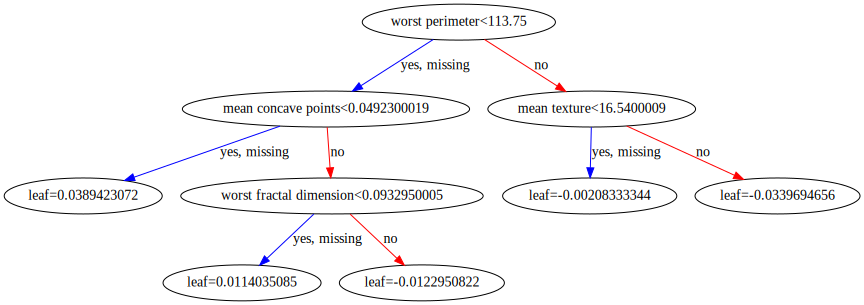

In [52]:
xgb.to_graphviz(bst,num_trees=0)


### 解析模型

In [75]:
import re
def string_parser(s):
    if len(re.findall(r":leaf=", s)) == 0:
        out  = re.findall(r"[\w.-]+", s)
        tabs = re.findall(r"[\t]+", s)
        if (out[4] == out[8]):
            missing_value_handling = (" or missing(" + out[1] + ")")
        else:
            missing_value_handling = ""

        if len(tabs) > 0:
            return (re.findall(r"[\t]+", s)[0].replace('\t', '    ') + 
                    '        if state = ' + out[0] + ' then do;\n' +
                    re.findall(r"[\t]+", s)[0].replace('\t', '    ') +
                    '            if ' + out[1] + ' < ' + out[2] + missing_value_handling +
                    ' then state = ' + out[4] + ';' +  ' else state = ' + out[6] + ';\nend;' ) 
        else:
            return ('        if state = ' + out[0] + ' then do;\n' +
                    '            if ' + out[1] + ' < ' + out[2] + missing_value_handling +
                    ' then state = ' + out[4] + ';' +  ' else state = ' + out[6] + ';\nend;' )
    else:
        out = re.findall(r"[\w.-]+", s)
        return (re.findall(r"[\t]+", s)[0].replace('\t', '    ') + 
                '        if state = ' + out[0] + ' then\n    ' +
                re.findall(r"[\t]+", s)[0].replace('\t', '    ') + 
                '        value = value + (' + out[2] + ') ;\n')

def tree_parser(tree, i):
    return ('state = 0;\n'
             + "".join([string_parser(tree.split('\n')[i]) for i in range(len(tree.split('\n'))-1)]))

def model_to_sas(model, out_file):
    trees = model.get_dump()
    result = ["value = 0;\n"]
    with open(out_file, 'w') as the_file:
        for i in range(len(trees)):
            result.append(tree_parser(trees[i], i))
        the_file.write("".join(result))
        the_file.write("\nY_Pred1 = 1/(1+exp(-value));\n")
        the_file.write("Y_Pred0 = 1 - Y_pred1;") 

In [76]:
model_to_sas(bst, 'xgb_scr_code.txt')